#로지스틱 회귀 분석(Logistic Regression)
##1.문제 정의
##2. 라이브러리 및 데이터 불러오기
##3. 데이터 확인하기
##4. 전처리 : 범주 변수 변환하기
##5. 모델링 및 예측하기
##6. 예측 모델 평가하기
##7. 이해하기

##- 알고리즘의 근간을 선형 회귀 분석에 두고 있어서 선형 회귀 분석과 상당히 유사함
##- 다루는 문제가 다름
##선형 회귀 분석 : 연속된 변수를 예측
##로지스틱 회귀 분석 : Yes/No처럼 두 가지로 나뉘는 분류 문제를 다룸

#장점 :
##- 모델이 간단하기 때문에 구현과 해석이 쉬움
##- 같은 이유로 모델링하는 데 오랜 시간이 걸리지 않음

#단점 :
##- 최신 알고리즘에 비해 예측력이 떨어짐
##- 독립변수와 예측변수의 선형관계를 전제로 하기 때문에, 이러한 전제에서 벗어나는 데이터에서는 좋은 예측을 보여주기 어려움

#로지스틱 회귀 분석 활용 분야
##2가지 범주
##- Yes/No, True/False와 같은 두 가지 범주로 나뉜 값을 예측하는 데 사용
##분류 문제
##- 기준선 Baseline으로 자주 활용됨(타 모델과 비교 목적)

#타이타닉호
##-타이타닉호는 북대서양 횡단 여객선
##-1912년 4월 10일 영궁의 사우샘프턴에서 출발하여 미국의 뉴욕으로 향하던 중에 빙산과 충돌하여 침몰
##-많은 사상자 발생

#데이터 셋 : 이름, 성별, 나이, 티켓
##- 정보가 실제로 생존에 어떤 영향을 미쳤는지 확인

#타이타닉 데이터, 이진분류 문제
##- 목표값이 0과 1로 구성된 때는 왜 선형 회귀 분석을 사용하지 않을까?
## ㄴ 0과 1만 갖는 이진분류에 회귀 분석을 적용하면 0과 1 사이에 있는 값도 가질 수 있는 예측이 된다.
## ㄴ 또한 1과 0을 벗어나는 예측값도 나오게 된다.
## ㄴ 이는 올바른 예측이 아니다

#로지스터 회귀 분석
##- 로지스틱 함수를 사용하여 선형 회귀 분석의 직선 형태를 0과 1사이의 값으로 제한하게 된다
##- 0과 1사이의 값들을 반올림하여 나오는 값에 따라 0 또는 1로 예측하게 된다

#로지스틱 회귀 :
##- 선형 회귀 분석을 기반으로 한 모델로, 연속형 종속변수가 아닌 이진분류 문제를 위한 알고리즘

#피처 엔지니어링 :
##- 기존 변수에서 더 나은 변수를 도출해내는 작업
##- 기존 변수를 사용해 새로운 변수 family를 만들어보았음

#상관관계 :
##- 두 변수 간의 연관성을 나타내는 것으로, 상관관계가 높으면 절댓값이 1에 가까움
##- 음의 상관관계 : -1, 양의 상관관계 : 1, 관계없음 : 0

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.head()
#survived : 1 생존, 0 사망
#pclass : 일등석, 이등석..
#sibsp : 함께 탑승한 사람 수(형제, 배우자 등)
#parch : 함께 탑승한 부모나 자식의 수
#embarked : 타이타닉에 승선한 항구 이름

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#전처리 : 범주형 변수 변환하기
##더미 변수와 원-핫 인코딩
##- object 자료형을 가진 칼럼들을 숫자화
##- 범주 형태(혹은 문자 형태)의 변수를 숫자로 표현하는 방법
##- 변수에 속해 있는 고윳값에 대한 새로운 변수들을 만들어 0과 1로 표현함
##- 여러 값 중 하나(one)만 활성화(hot)하는 인코딩


In [ ]:
data.corr()
#오류뜬다

ValueError: could not convert string to float: 'male'

In [ ]:
#숫자형 칼럼만 골라서 상관관계 계산하기
data.select_dtypes(include='number').corr()
# sibsp와 parch의 상관관계 계수가 높다 == 배우자, 형제 자매와 오면 부모와도 왔을 확률이 높다
# 0.4는 여기선 비교적 높은 수치일 뿐..

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
#문자형 데이터를 숫자로 바꿔주기 (예: 'male' ➝ 0, 'female' ➝ 1)
# data.loc[data['sex'] == 'male','sex']=0
# data.loc[data['sex'] == 'female','sex']=1
# data.corr()

ValueError: could not convert string to float: 'S'

In [ ]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

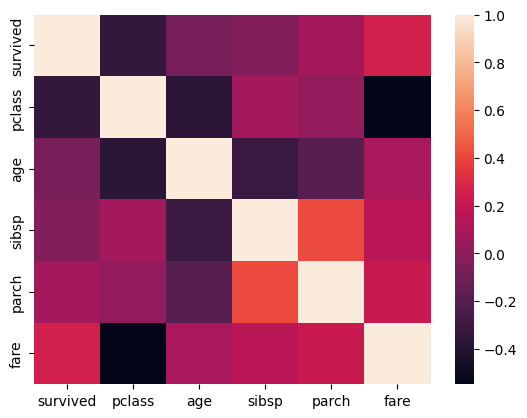

In [ ]:
sns.heatmap(data.select_dtypes(include='number').corr())
#+1이나 -1로 갈수록 상관관계가 존재한다고 본다
#양의 상관관계, 음의 상관관계

<function matplotlib.pyplot.show(close=None, block=None)>

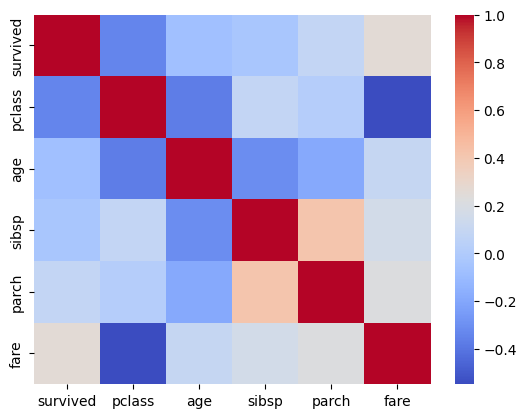

In [ ]:
#색상 변경
sns.heatmap(data.select_dtypes(include='number').corr(), cmap = 'coolwarm')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

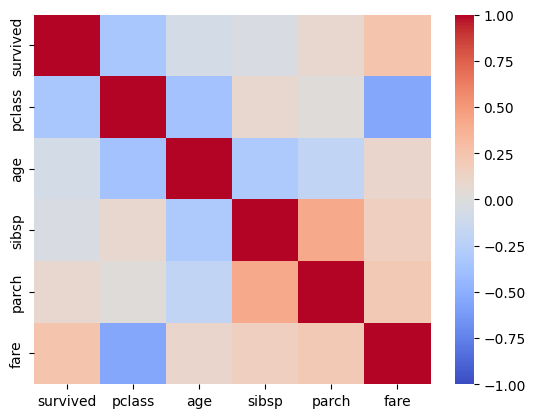

In [ ]:
#상관계수 최솟값 최댓값 설정
sns.heatmap(data.select_dtypes(include='number').corr(), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.show

<Axes: >

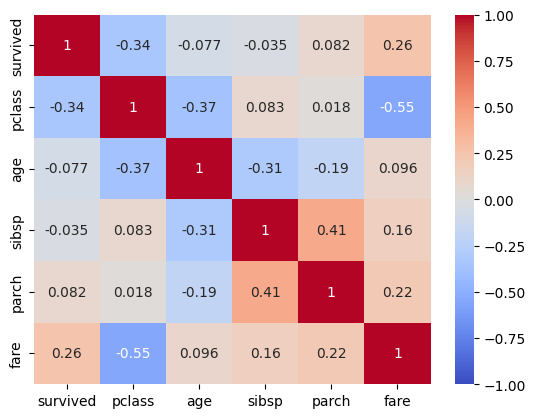

In [ ]:
#수치 표기
sns.heatmap(data.select_dtypes(include='number').corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot=True)

In [ ]:
#sns에서 불러온 titanic데이터에는 name과 ticket 칼럼이 없다..
#교수님은 데이터 어디서 가져오는거지...
data['Name'].nunique()
#값이 다른 것의 개수

In [ ]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data['sex'].nunique()

2

In [ ]:
#승선한 항구는 3곳
data['embark_town'].nunique()

3

In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
df = data[['pclass','sex','age','sibsp','parch','embarked','survived']]
df.head()

,pclass,sex,age,sibsp,parch,embarked,survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


#더미 변수와 원-핫 인코딩
##- 범주 형태(혹은 문자 형태)의 변수를 숫자로 표현하는 방법
##- 변수에 속해 있는 고윳값에 대한 새로운 변수들을 만들어 1과 0으로 표현함(해당 변수는 1, 나머지 변수는 0)

In [ ]:
pd.get_dummies(df, columns=['sex', 'embarked'])

,pclass,age,sibsp,parch,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.0,1,0,0,False,True,False,False,True
1,1,38.0,1,0,1,True,False,True,False,False
2,3,26.0,0,0,1,True,False,False,False,True
3,1,35.0,1,0,1,True,False,False,False,True
4,3,35.0,0,0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,0,False,True,False,False,True
887,1,19.0,0,0,1,True,False,False,False,True
888,3,NaN,1,2,0,True,False,False,False,True
889,1,26.0,0,0,1,False,True,True,False,False


In [ ]:
pd.get_dummies(df, columns=['sex', 'embarked'], dtype=int)


,pclass,age,sibsp,parch,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.0,1,0,0,0,1,0,0,1
1,1,38.0,1,0,1,1,0,1,0,0
2,3,26.0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,1,0,0,0,1
4,3,35.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,0,0,1,0,0,1
887,1,19.0,0,0,1,1,0,0,0,1
888,3,NaN,1,2,0,1,0,0,0,1
889,1,26.0,0,0,1,0,1,1,0,0


In [ ]:
#sex_male, embarked_C 없애기
pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

,pclass,age,sibsp,parch,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,0,True,False,True
1,1,38.0,1,0,1,False,False,False
2,3,26.0,0,0,1,False,False,True
3,1,35.0,1,0,1,False,False,True
4,3,35.0,0,0,0,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,0,True,False,True
887,1,19.0,0,0,1,False,False,True
888,3,NaN,1,2,0,False,False,True
889,1,26.0,0,0,1,True,False,False


In [ ]:
pd.get_dummies(df, columns=['sex', 'embarked'],  dtype=int, drop_first=True)

,pclass,age,sibsp,parch,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,0,1,0,1
887,1,19.0,0,0,1,0,0,1
888,3,NaN,1,2,0,0,0,1
889,1,26.0,0,0,1,1,0,0


In [30]:
df = pd.get_dummies(df, columns=['sex', 'embarked'],  dtype=int, drop_first=True)

In [31]:
df = df.dropna()

In [32]:
df

,pclass,age,sibsp,parch,survived,sex_male,embarked_Q,embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,0,0,1,0
886,2,27.0,0,0,0,1,0,1
887,1,19.0,0,0,1,0,0,1
889,1,26.0,0,0,1,1,0,0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#생존 여부를 예측하기 위해
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8111888111888111

In [42]:
#변수별 생존에 끼친 영향
model.coef_
#2차원

array([[-1.23582639, -0.03850017, -0.30527826, -0.02942299, -2.45390089,
        -0.6005258 , -0.32676175]])

In [44]:
pd.Series(model.coef_[0], index=X.columns)
#음수 : 변수가 사망에 가깝게 도움
#양수 : 변수가 생존에 가깝게 도움

#pclass값이 높아질수록 사망에 가깝다 -> 등석 등급이 낮아질수록(1등급에서 3등급으로 갈수록) 사망
#sibsp값이 높아질수록 사망에 가깝다 -> 형제 자매 수가 많을수록 사망
#sex_male값이 높아질수록 사망에 가깝다 -> 남성 수가 많을수록 많이 사망

,0
pclass,-1.235826
age,-0.038500
sibsp,-0.305278
parch,-0.029423
sex_male,-2.453901
embarked_Q,-0.600526
embarked_S,-0.326762


In [45]:
#변수 둘이 상관관계가 높기 때문에 하나의 변수로 새롭게 만들어 모델 학습시키기
#사실상 둘이 하나다. -> 둘 중 하나만 쓰기 or 둘을 하나로 합치기
df['family'] = df['sibsp'] + df['parch']
df.drop(['sibsp','parch'], axis=1, inplace = True)
df.head()

,pclass,age,survived,sex_male,embarked_Q,embarked_S,family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [46]:
X = df.drop('survived',axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8251748251748252

#1. 피처 엔지니어링(특성공학)
##기존 데이터를 손보아 더 나은 변수를 만드는 기법
##ㄴ좋은 변수를 만들기 위해 도메인 지식의 활용이 중요함

#2. 다중공선성 문제
## 독립변수 사이에 상관관계가 높은 때에 발생하는 문제
##- 상관관계가 높은 변수 중 하나를 제거하기
##- 둘을 모두 포괄시키는 새로운 변수를 만들기
##- PCA와 같은 차원 축소를 수행해 해결하기(독립변수의 개수를 줄이는 방법)

#PCA(Principal Component Analysis) : 주성분 분석
#다중공선성 문제 :
##- 변수 간의 강한 상관관계가 있을 때 발생하는 문제
##- 선형 모델은 독립변수 간의 독립성을 전제로 하기 때문에 다중공선성 문제를 해결해 주는 것이 좋음

#로지스틱 회귀 분석(Logistic Regression)
##1.문제 정의
##- 타이타닉 탑승객 정보를 사용하여 생존 여부를 예측하는 문제를 정의
##2. 라이브러리 및 데이터 불러오기
##- 판다스와 프로젝트에 쓸 예제 데이터셋을 불러옴
##3. 데이터 확인하기
##- 데이터 특성을 살펴보았음
##4. 전처리 : 범주 변수 변환하기
##- 더미변수를 사용하여 범주형 변수인 sex와 embarked(승선한 항구)를 숫자 형태로 변환해 주었음
##5. 모델링 및 예측하기
##- 로지스틱 회귀를 사용하여 예측모델을 만들었음
##6. 예측 모델 평가하기
##- 약 82%의 정확도를 얻음
##7. 이해하기



#더미 변수와 원-핫 인코딩
##- 범주 형태(혹은 문자 형태)의 변수를 숫자로 표현하는 방법
##- 변수에 속해 있는 고윳값에 대한 새로운 변수들을 만들어 1과 0으로 표현함(해당 변수는 1, 나머지 변수는 0)
